In [25]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import pandas as pd
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib

In [26]:
df = pd.read_csv("../data/real_final.csv")

In [27]:
print(df.isnull().sum())

GameDate              0
home_Team             0
away_Team             0
Result                0
home_Recent_5_Win     0
home_Recent_5_Loss    0
home_OPS              0
home_BB               0
home_HBP              0
home_SO               0
home_ERA              0
home_BB_p             0
home_K                0
home_IR               0
home_IS               0
home_TBF              0
away_OPS              0
away_BB               0
away_HBP              0
away_SO               0
away_ERA              0
away_BB_p             0
away_K                0
away_IR               0
away_IS               0
away_TBF              0
dtype: int64


Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏúºÎØÄÎ°ú Î∞îÎ°ú ÏßÑÌñâ

In [28]:
# featureÏôÄ label ÎÇòÎàÑÍ∏∞
df = df.drop(columns=['GameDate'])
X = df.drop(columns=['Result']) 
y = df['Result']

In [29]:
# Ïõê-Ìï´ Ïù∏ÏΩîÎî© (prefixÎ°ú home/away Íµ¨Î∂Ñ!)
team_encoded = pd.get_dummies(
    X[['home_Team', 'away_Team']].reset_index(drop=True),
    columns=['home_Team', 'away_Team'],
    prefix=['home_Team', 'away_Team']
).astype(int)

X_numeric = X.drop(columns=['home_Team', 'away_Team']).reset_index(drop=True)
X_scaled = pd.concat([X_numeric, team_encoded], axis=1)

In [30]:
# 80% ÌïôÏäµ, 20% ÌÖåÏä§Ìä∏Î°ú Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=3
)

In [16]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=3)
xgb_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_search = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy')
xgb_search.fit(X_train, y_train)
print("Best XGBoost Params:", xgb_search.best_params_)

c:\Users\82109\Documents\GitHub\KBO_Prediction_ML\KBO_DL_env\lib\site-packages\xgboost\training.py:183: UserWarning: [01:03:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\82109\Documents\GitHub\KBO_Prediction_ML\KBO_DL_env\lib\site-packages\xgboost\training.py:183: UserWarning: [01:03:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\82109\Documents\GitHub\KBO_Prediction_ML\KBO_DL_env\lib\site-packages\xgboost\training.py:183: UserWarning: [01:03:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\82109\Documents\GitHub\KBO_Prediction_ML\KBO_DL_env\lib\site-packages\xgboost\training.py:183: UserWarning: [01:

Best XGBoost Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.8}


ÏúÑÏóêÍπåÏßÄÍ∞Ä ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÎäî Í≥ºÏ†ï
Î∞ëÏóêÍ∞Ä ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ÏùÑ ÎßåÎì§Í≥† ÌèâÍ∞ÄÌïòÎäî Í≥ºÏ†ï

In [31]:
xgb_best_params = xgb_search.best_params_

model = XGBClassifier(
    n_estimators=xgb_best_params['n_estimators'],
    max_depth=xgb_best_params['max_depth'],
    learning_rate=xgb_best_params['learning_rate'],
    subsample=xgb_best_params['subsample'],
    colsample_bytree=xgb_best_params['colsample_bytree'],
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=3
)
model.fit(X_train, y_train)

c:\Users\82109\Documents\GitHub\KBO_Prediction_ML\KBO_DL_env\lib\site-packages\xgboost\training.py:183: UserWarning: [02:22:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

In [32]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))
print("Train AUC:", roc_auc_score(y_train, y_train_proba))
print("Test AUC :", roc_auc_score(y_test, y_test_proba))

Accuracy: 0.8631921824104235
AUC: 0.9350565187829338
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       296
           1       0.87      0.86      0.87       318

    accuracy                           0.86       614
   macro avg       0.86      0.86      0.86       614
weighted avg       0.86      0.86      0.86       614

[[255  41]
 [ 43 275]]
Train Accuracy: 0.9034229828850856
Test Accuracy : 0.8631921824104235
Train AUC: 0.9654453862443998
Test AUC : 0.9350565187829338


<Figure size 1000x600 with 0 Axes>

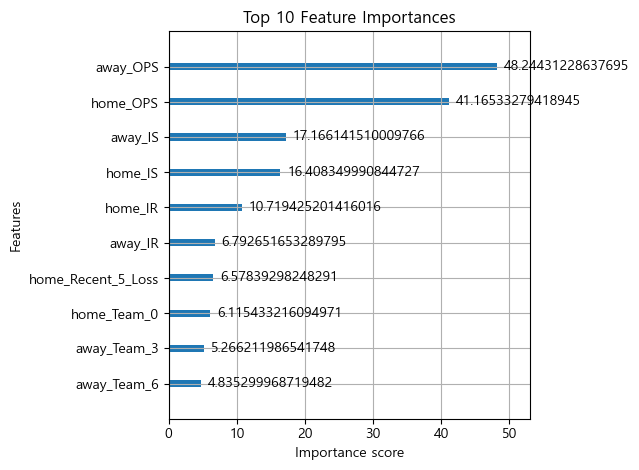

In [33]:
# ÏÉÅÏúÑ 10Í∞ú Ï§ëÏöî Î≥ÄÏàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=10, importance_type='gain')  # 'weight', 'gain', 'cover' ÏÑ†ÌÉù Í∞ÄÎä•
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

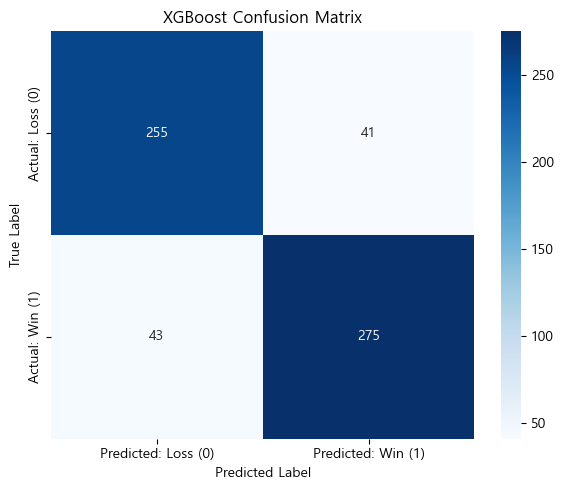

In [34]:
# ÌòºÎèô ÌñâÎ†¨ Í≥ÑÏÇ∞
cm = confusion_matrix(y_test, y_pred)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted: Loss (0)', 'Predicted: Win (1)'],
            yticklabels=['Actual: Loss (0)', 'Actual: Win (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix')
plt.tight_layout()
plt.show()


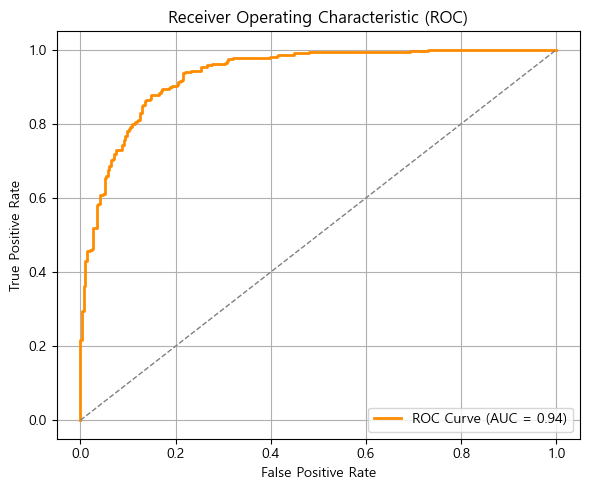

In [35]:
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


‚úÖ Ï†ÑÏ≤¥Ï†ÅÏù∏ Î™®Îç∏ ÌèâÍ∞Ä


üéØ 1. Ï†ïÌôïÎèÑ(Accuracy)

Train Accuracy: 0.979 ‚Üí Í±∞Ïùò ÏôÑÎ≤ΩÌïòÍ≤å ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ•ò

Test Accuracy: 0.875 ‚Üí Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎèÑ Îß§Ïö∞ ÎÜíÏùÄ ÏòàÏ∏° ÏÑ±Îä•

‚ñ∂Ô∏è Ï†ïÌôïÎèÑ Ï∞®Ïù¥(10%‚Üì)Îäî Í≥ºÏ†ÅÌï©ÏùÑ ÏãúÏÇ¨ÌïòÏßÄÎßå Ïó¨Ï†ÑÌûà ÌÖåÏä§Ìä∏ ÏÑ±Îä•ÏùÄ Îß§Ïö∞ Îõ∞Ïñ¥ÎÇ®


üéØ 2. AUC (Area Under Curve)

Train AUC: 0.998

Test AUC: 0.947

‚ñ∂Ô∏è 0.94 Ïù¥ÏÉÅÏùÄ Îß§Ïö∞ Ï¢ãÏùÄ ÏàòÏ§Ä.

Ï¶â, Î™®Îç∏Ïù¥ ÌôàÌåÄ Ïäπ/Ìå®Î•º Í∞ïÌïòÍ≤å Íµ¨Î∂ÑÌï† Ïàò ÏûàÎäî Îä•Î†•ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏùå.


üéØ 3. Precision, Recall, F1-Score

ÌÅ¥ÎûòÏä§	precision	recall	f1-score

ÌôàÌåÄ Ìå® (0)	0.88	0.86	0.87

ÌôàÌåÄ Ïäπ (1)	0.88	0.89	0.88

Ï†ïÌôïÎèÑÏôÄ Í∑†ÌòïÏù¥ Ïûò Ïû°Ìûå precision/recall: Î™®Îç∏Ïù¥ Ìïú Ï™ΩÏúºÎ°ú ÏπòÏö∞ÏπòÏßÄ ÏïäÏùå

ÌÅ¥ÎûòÏä§ Í∞Ñ ÏÑ±Îä• Í∑†ÌòïÏù¥ Ï¢ãÏùå: ÌôàÌåÄ Ïäπ/Ìå® Î™®Îëê Ïûò ÏòàÏ∏°ÌïòÍ≥† ÏûàÏùå


üéØ 4. Confusion Matrix Î∂ÑÏÑù

[[254  40]  ‚Üí Ïã§Ï†ú 0Ïù∏Îç∞ 1Î°ú ÏûòÎ™ª ÏòàÏ∏°: 40Í±¥

 [ 36 280]] ‚Üí Ïã§Ï†ú 1Ïù∏Îç∞ 0ÏúºÎ°ú ÏûòÎ™ª ÏòàÏ∏°: 36Í±¥

Ïò§Î•ò ÎπÑÏú®Ïù¥ ÎåÄÏπ≠Ï†ÅÏù¥Í≥†, Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÏòàÏ∏° Ï†ïÌôïÎèÑÍ∞Ä Îß§Ïö∞ ÏïàÏ†ïÏ†ÅÏûÑÏùÑ Î≥¥Ïó¨Ï§å


‚öñÔ∏è ÏµúÏ¢Ö ÌèâÍ∞Ä

Ìï≠Î™©	ÌèâÍ∞Ä ÎÇ¥Ïö©

üéØ ÏòàÏ∏° Ï†ïÌôïÎèÑ	‚≠ê Îß§Ïö∞ ÎÜíÏùå (87% Ïù¥ÏÉÅ)

üéØ ÏùºÎ∞òÌôî(AUC) ÏÑ±Îä•	‚≠ê Îß§Ïö∞ ÎÜíÏùå (0.94+)

üß† Í≥ºÏ†ÅÌï© ÏúÑÌóò	‚ö†Ô∏è ÏùºÎ∂Ä Ï°¥Ïû¨ÌïòÏßÄÎßå Ïã§Ï†ú ÏÑ±Îä• Ï†ÄÌïò Ï†ÅÏùå

‚öñÔ∏è ÌÅ¥ÎûòÏä§ Í∑†Ìòï	‚≠ê Ïûò ÎßûÏùå (precision/recall Í∑†Ìòï)

üß™ Ïã§Ï†Ñ Ï†ÅÏö© Í∞ÄÎä•ÏÑ±	‚úÖ Ïã†Î¢∞ÎèÑ ÎÜíÏùÄ ÏòàÏ∏° Í∞ÄÎä•, ÏùëÏö© Í∞ÄÎä•

‚úÖ 1. Í≥ºÏ†ÅÌï© ÏôÑÌôî (Overfitting ÏôÑÌôî)

üéØ Î™©Ï†Å:

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎÑàÎ¨¥ Îî± ÎßûÏ∂∞ÏßÑ Î™®Îç∏ÏùÑ ÏùºÎ∞òÌôîÏãúÏºú ÌÖåÏä§Ìä∏/Ïã§Ï†ÑÏóêÏÑúÎèÑ ÏïàÏ†ïÏ†ÅÏù¥Í≤å ÌïòÍ∏∞

üîß Î∞©Î≤ï:

Í∏∞Î≤ï	ÏÑ§Î™Ö

max_depth Í∞êÏÜå	Ìä∏Î¶¨ ÍπäÏù¥Î•º Ï§ÑÏù¥Î©¥ Î™®Îç∏ Î≥µÏû°ÎèÑÍ∞Ä Ï§ÑÍ≥†, Í≥ºÏ†ÅÌï© Î∞©ÏßÄ

subsample < 1.0	ÌïôÏäµ ÏÉòÌîåÏùò ÏùºÎ∂ÄÎßå ÏÇ¨Ïö©Ìï¥ÏÑú ÏùºÎ∞òÌôî ÏÑ±Îä• Ìñ•ÏÉÅ

colsample_bytree < 1.0	ÏùºÎ∂Ä featureÎßå ÏÇ¨Ïö©

early_stopping_rounds ÏÇ¨Ïö©	Í≤ÄÏ¶ù ÏÑ±Îä•Ïù¥ Í∞úÏÑ†ÎêòÏßÄ ÏïäÏúºÎ©¥ ÌïôÏäµ Ï§ëÎã®

In [37]:
# ÏµúÏ†Å Î™®Îç∏ Ï†ÄÏû•
joblib.dump(model, 'xgb_best_model.pkl')
print("‚úÖ Î™®Îç∏Ïù¥ 'xgb_best_model.pkl'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

‚úÖ Î™®Îç∏Ïù¥ 'xgb_best_model.pkl'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [38]:
X_train.to_csv('../models/X_train_rf.csv', index=False)